In [14]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sklearn

In [22]:
os.getcwd()
os.chdir('/Users/abhi/Desktop/bike_counters_mdsb2021/New/Data')
df1 = pd.read_csv('external_data.csv')
df1_copy = df1.copy()

df2  = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df2  = df2.loc[df2['location'] == 'France']
mask = (df2['date'] >= '2020-09-01') & (df2['date'] <= '2021-09-09')
df2  = df2.loc[mask]

df1_copy.rename(columns = {'date': 'datetime'}, inplace = True)
df1_copy[['date','time']] = df1_copy.datetime.str.split(" ",expand = True)

df2.columns
relevant_df2 = df2[['date','new_cases','new_deaths','total_vaccinations','people_vaccinated', 
                    'people_fully_vaccinated','stringency_index']]
df2
df3 = relevant_df2.merge(df1_copy, how ='left', on ='date')
df3
#df3["date_time"] = df3["date"] +" "+df3["time"]
df3 = df3.drop('date', axis = 1)
df3 = df3.drop('time', axis = 1)
df3.rename(columns = {'datetime': 'date'}, inplace = True)
df3.to_csv('New_External_Data.csv')

In [23]:
df3.head()

,new_cases,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,numer_sta,date,pmer,tend,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,5104.0,27.0,NaN,NaN,NaN,46.76,7149,2020-09-01 00:00:00,102050,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5104.0,27.0,NaN,NaN,NaN,46.76,7149,2020-09-01 03:00:00,101990,-60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5104.0,27.0,NaN,NaN,NaN,46.76,7149,2020-09-01 06:00:00,102000,10,...,4000.0,1.0,0.0,7500.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5104.0,27.0,NaN,NaN,NaN,46.76,7149,2020-09-01 09:00:00,101970,0,...,950.0,1.0,3.0,4500.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5104.0,27.0,NaN,NaN,NaN,46.76,7149,2020-09-01 12:00:00,101850,-110,...,1410.0,5.0,NaN,2160.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = pd.read_parquet('train.parquet')
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


<AxesSubplot:xlabel='date'>

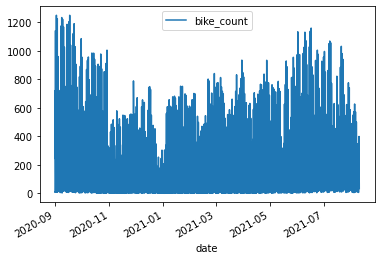

In [25]:
mask = data['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N'
data[mask].plot(x='date', y='bike_count')

<AxesSubplot:xlabel='date'>

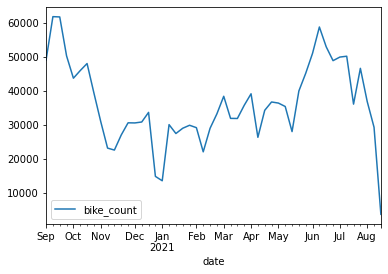

In [26]:
data[mask].groupby(pd.Grouper(freq='1w', key='date'))[['bike_count']].sum().plot()

<AxesSubplot:xlabel='date'>

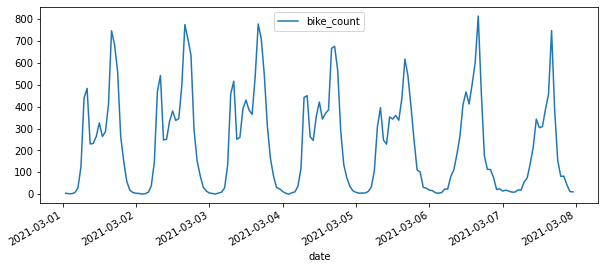

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))

mask = ((data['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N')
        & (data['date'] > pd.to_datetime('2021/03/01'))
        & (data['date'] < pd.to_datetime('2021/03/08')))

data[mask].plot(x='date', y='bike_count', ax=ax)